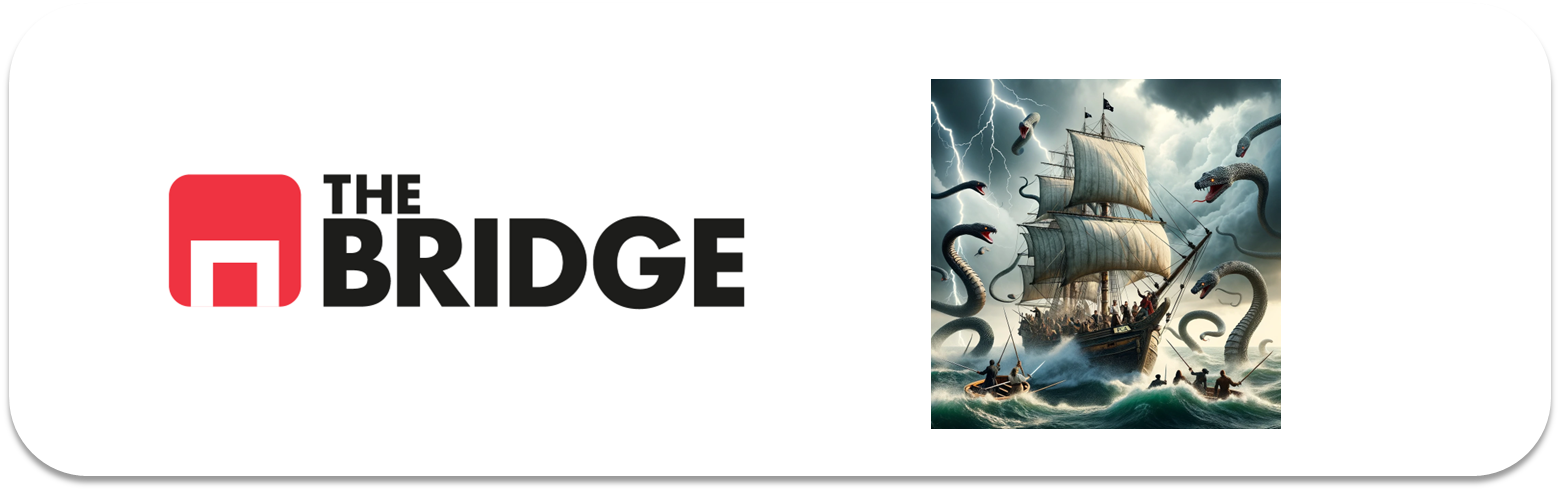

# PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

## Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bootcampviztools as bt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mutual_info_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel, SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import mannwhitneyu, chi2_contingency, f_oneway
from lightgbm import LGBMClassifier

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

## Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

In [34]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:



### 1
Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.


In [36]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

#### features numberof

In [37]:
df["30-59 days late"] = df["NumberOfTime30-59DaysPastDueNotWorse"].replace(to_replace={val: 1 for val in df['NumberOfTime30-59DaysPastDueNotWorse'].unique() if val != 0})

cat_col = ["30-59 days late"]

In [38]:
df['90 days late'] = df['NumberOfTimes90DaysLate'].replace(to_replace={val: 1 for val in df['NumberOfTimes90DaysLate'].unique() if val != 0})
cat_col.append('90 days late')

In [39]:
df['NumberRealEstateLoansOrLines'] = df['NumberRealEstateLoansOrLines'].apply(lambda x: x if x in [0, 1, 2] else 3)

cat_col.append("NumberRealEstateLoansOrLines")

In [40]:
df['60-89 days late'] = df['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda x: 0 if x == 0 else 1)
cat_col.append("60-89 days late")
df["60-89 days late"].value_counts().sort_index()

60-89 days late
0    11206
1      610
Name: count, dtype: int64

In [41]:
df['Dependents'] = df['NumberOfDependents'].apply(lambda x: 0 if x == 0 else 1)
cat_col.append("Dependents")

df["Dependents"].value_counts().sort_index()

Dependents
0    6413
1    5403
Name: count, dtype: int64

In [42]:
df["NumberOfDependents"].value_counts().sort_index()

NumberOfDependents
0.0     6413
1.0     2369
2.0     1813
3.0      881
4.0      251
5.0       61
6.0       24
7.0        1
8.0        2
10.0       1
Name: count, dtype: int64

####

In [43]:
target = "SeriousDlqin2yrs"

cat_originales = [col for col in df.columns if col.startswith('Number')]

num_col=[]
for col in df.columns:
    if col != target:
        if (col not in cat_col) and (col not in cat_originales):
            num_col.append(col)
num_col

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']

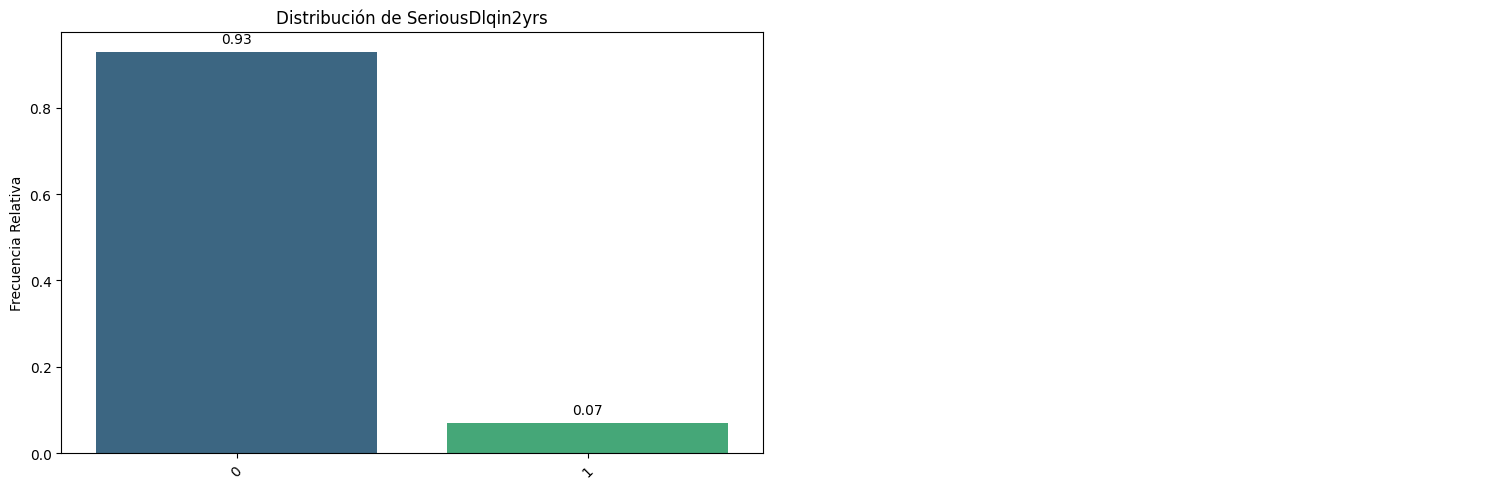

In [44]:
bt.pinta_distribucion_categoricas(df, [target], True, True)

- target muy desbalanceado: balanced accuracy

In [45]:
train, test = train_test_split(df[num_col + cat_col + [target]], test_size=.2, random_state=42)

In [46]:
train

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,30-59 days late,90 days late,NumberRealEstateLoansOrLines,60-89 days late,Dependents,SeriousDlqin2yrs
11145,0.391240,68,2.693124,2166.0,0,0,2,0,0,0
2012,0.906540,59,0.325227,6496.0,0,0,0,0,1,0
5428,0.933223,52,0.372442,8258.0,1,0,1,0,1,0
12130,0.857859,50,0.511098,5225.0,0,0,1,0,0,0
36,0.000000,61,0.414167,5166.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
11966,0.397822,53,0.332584,11560.0,0,0,2,0,0,0
5512,0.015171,76,0.005427,3500.0,0,0,0,0,0,0
5719,0.988201,62,0.450432,8442.0,0,0,1,0,0,0
922,0.122072,41,0.638133,3749.0,0,0,1,0,1,0


### 2


A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 


1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
4. Selección de las mejores features empleando RFE.
5. Selección de las mejores features empleando SFS.
6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    

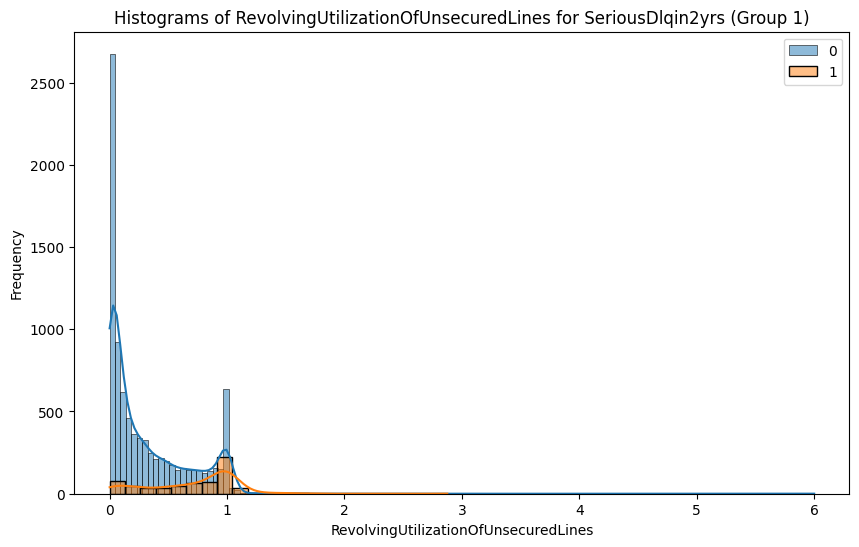

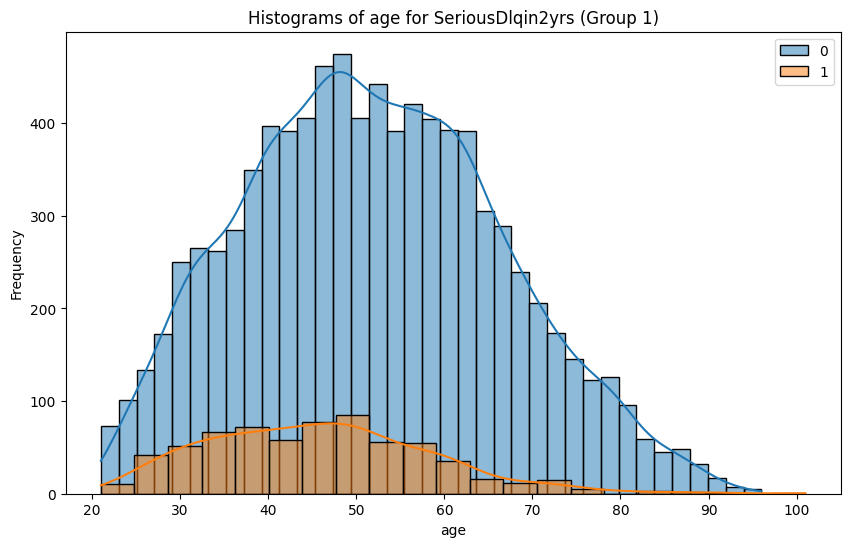

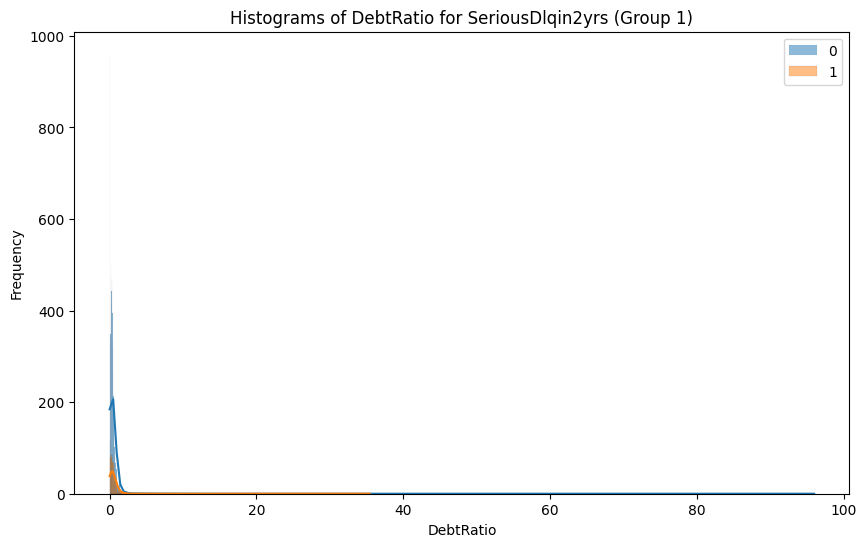

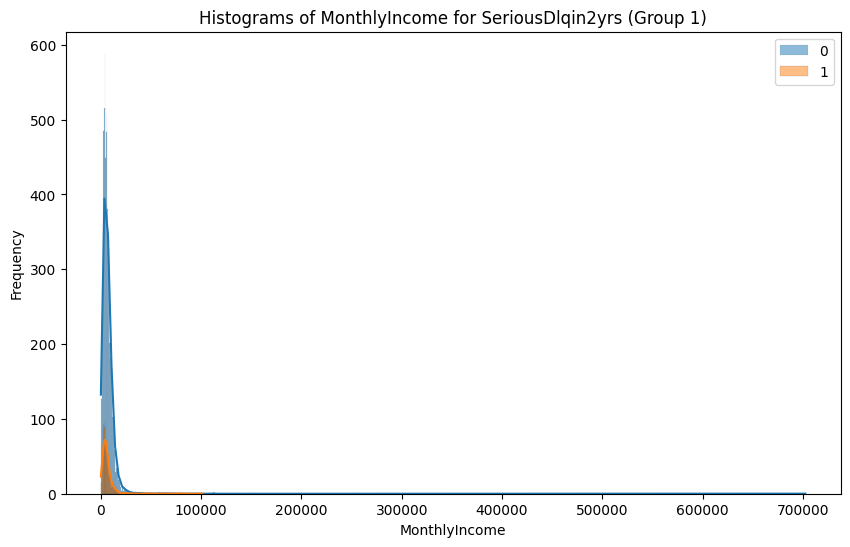

In [47]:
for col in num_col:
    bt.plot_grouped_histograms(train, target, col, group_size=2)

In [48]:
for col in num_col:

    grupo_a = train.loc[train[target] == 0][col]
    grupo_b = train.loc[train[target] == 1][col]

    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

    print(col, round(p_valor,2))

RevolvingUtilizationOfUnsecuredLines 0.0
age 0.0
DebtRatio 0.0
MonthlyIncome 0.0


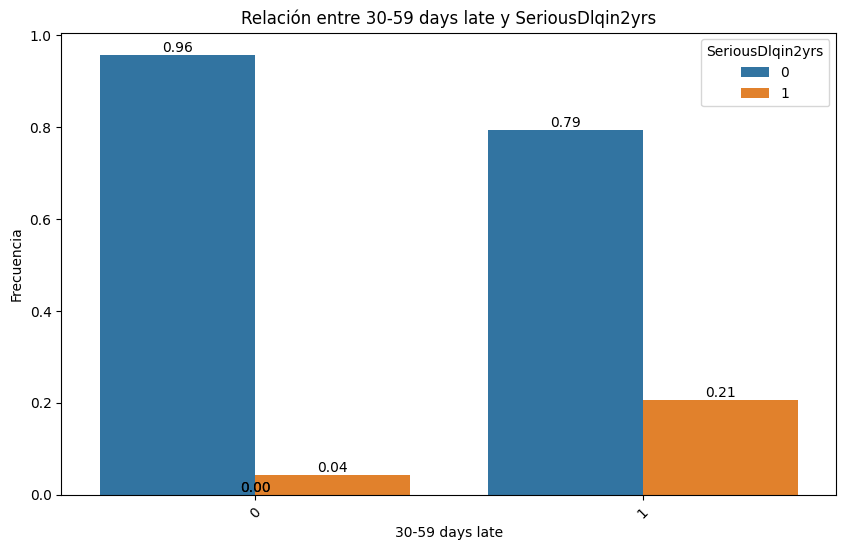

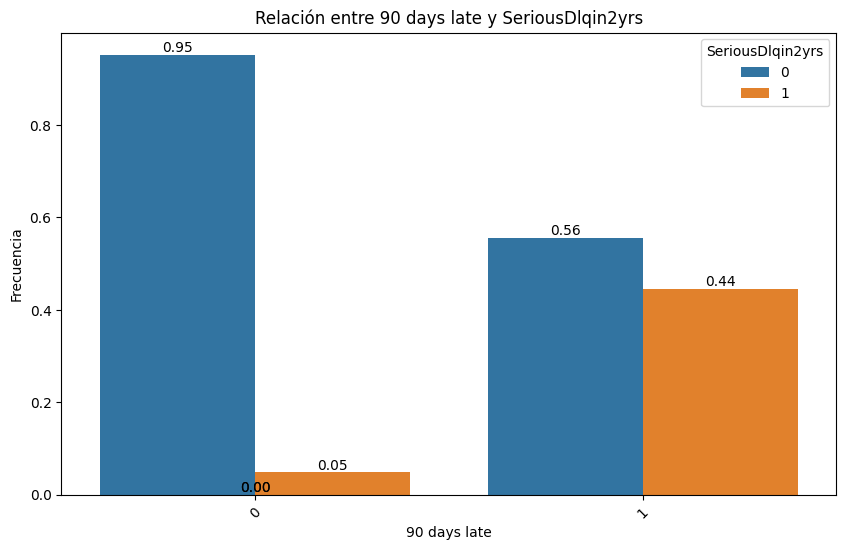

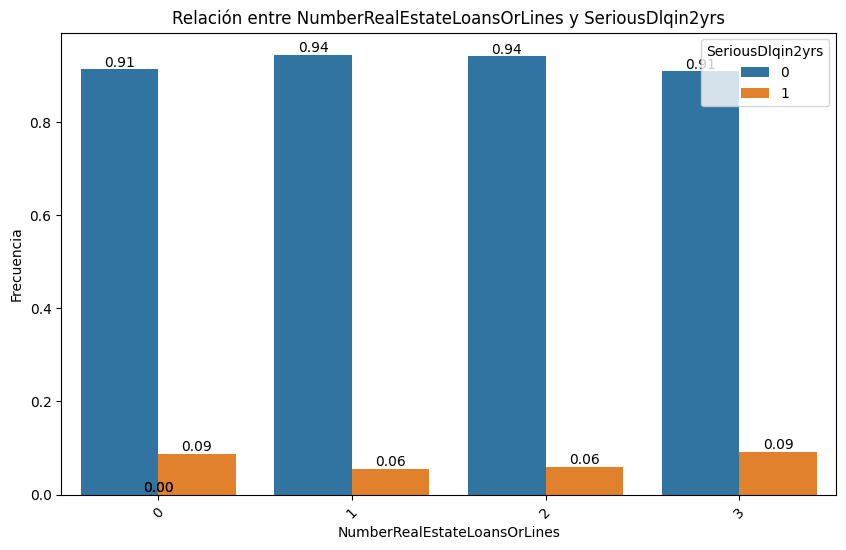

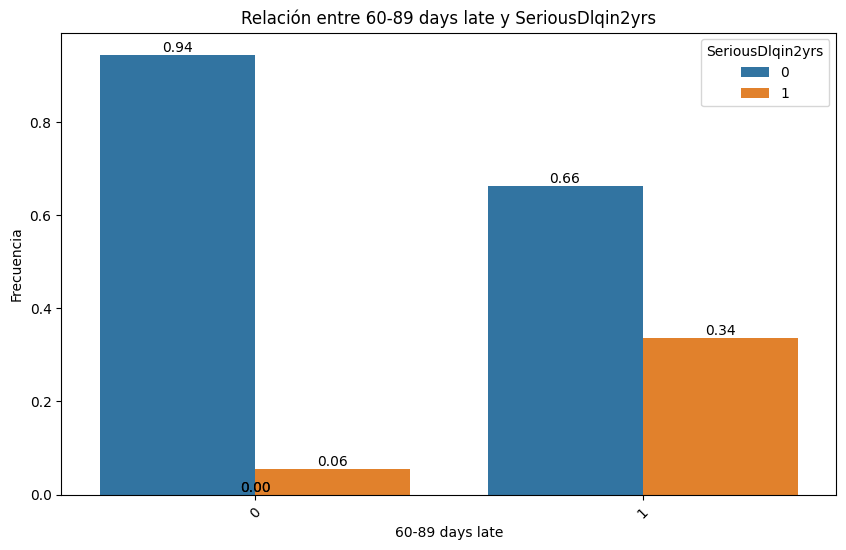

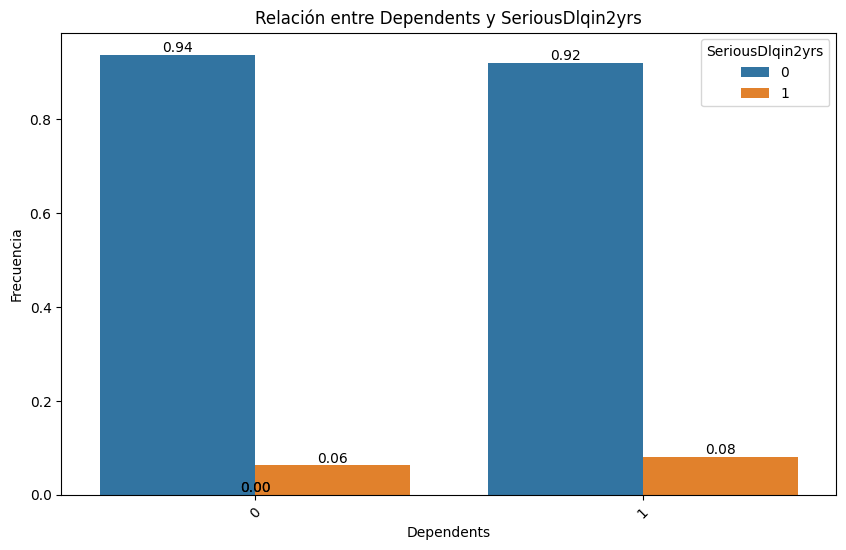

In [49]:
for col in cat_col:
    bt.plot_categorical_relationship_fin(train, col, target, True, True)

In [50]:
for col in cat_col:
    contingency_table = pd.crosstab(train[col], train[target])
    chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
    print(col, round(p_value,2))

30-59 days late 0.0
90 days late 0.0
NumberRealEstateLoansOrLines 0.0
60-89 days late 0.0
Dependents 0.0


In [51]:
features_visual = ["RevolvingUtilizationOfUnsecuredLines","age","DebtRatio","MonthlyIncome"] + ["90 days late", "30-59 days late", "60-89 days late"]

2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    

In [52]:
from scipy.stats import f_oneway

ps = []

for col in num_col:

    grupo_a = train.loc[train[target] == 0][col]
    grupo_b = train.loc[train[target] == 1][col]

    u_stat, p_value = f_oneway(grupo_a, grupo_b)
    ps.append(p_value)

pd.DataFrame({"col": num_col, "p_value":ps}).sort_values(by="p_value")

,col,p_value
0,RevolvingUtilizationOfUnsecuredLines,6.129144e-175
1,age,7.783159e-26
3,MonthlyIncome,7.744591e-02
2,DebtRatio,8.562979e-01


In [53]:
filtrado_num = ["RevolvingUtilizationOfUnsecuredLines", 
                "age"]

In [54]:
X_train = train[num_col]
y_train = train[target]

selector = SelectKBest(f_classif, k=4)
x_data_kbest = selector.fit_transform(X_train, y_train)

selector.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome'], dtype=object)

In [55]:
mis = []
for col in cat_col:
    mi = mutual_info_score(train[col], train[target])
    mis.append(mi)

pd.DataFrame({"col":cat_col,"mi":mis}).sort_values(by="mi", ascending=False)

,col,mi
1,90 days late,0.034215
0,30-59 days late,0.022123
3,60-89 days late,0.017771
2,NumberRealEstateLoansOrLines,0.001811
4,Dependents,0.000593


In [56]:
primera_filtrado = filtrado_num + ["90 days late", "30-59 days late", "60-89 days late"]

3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    

In [57]:
X_train = train.drop(columns=[target])
y_train = train[target].copy()

rf = RandomForestClassifier(random_state=42)

selector_model = SelectFromModel(estimator = rf, threshold= "median") 

selector_model.fit(X_train, y_train) 
selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', '90 days late'], dtype=object)

In [58]:
primera_sfm = selector_model.get_feature_names_out().tolist()
primera_sfm

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 '90 days late']

4. Selección de las mejores features empleando RFE.
    

In [59]:
rf = RandomForestClassifier(random_state= 42)

In [60]:
rfe = RFE(estimator = rf,
          n_features_to_select= 6,
          step = 1)

rfe.fit(X_train, y_train)
print("rfe.ranking_:", rfe.ranking_)

rfe.ranking_: [1 1 1 1 1 1 2 3 4]


In [62]:
rfe.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', '30-59 days late', '90 days late'], dtype=object)

In [61]:
primera_rfe = pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = X_train.columns).sort_values("ranking").iloc[:6].index.tolist()
primera_rfe

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 '30-59 days late',
 '90 days late']

5. Selección de las mejores features empleando SFS.
    

In [63]:
sfs_forward = SequentialFeatureSelector(rf,
                                        n_features_to_select = 6,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)

print("Elegidas SFS:", sfs_forward.get_feature_names_out())

Elegidas SFS: ['RevolvingUtilizationOfUnsecuredLines' 'DebtRatio' '30-59 days late'
 '90 days late' 'NumberRealEstateLoansOrLines' 'Dependents']


In [64]:
primera_sfs = sfs_forward.get_feature_names_out().tolist()

6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [65]:
for col in X_train.columns:
    listas = [primera_filtrado, primera_rfe, primera_sfs, primera_sfm]

    # Inicializar un contador
    contador = 0

    # Iterar sobre las listas
    for lista in listas:
        # Verificar si la variable objetivo está en la lista actual
        if col in lista:
            contador += 1
    print(col, contador)

RevolvingUtilizationOfUnsecuredLines 4
age 3
DebtRatio 3
MonthlyIncome 2
30-59 days late 3
90 days late 4
NumberRealEstateLoansOrLines 1
60-89 days late 1
Dependents 1


In [31]:
votadas_mejores = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio", "90 days late", "MonthlyIncome", "age"]

In [32]:
listas.append(votadas_mejores)

### 3
 Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [33]:
X_test = test[num_col+cat_col]
y_test = test[target].copy()

In [34]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [35]:
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
lgbm = LGBMClassifier(verbosity=0, random_state=42)

modelos = [lr, rf, lgbm]
nombres_listas = ["filtrado", "rfe", "sfs", "sfm", "votadas"]

modelin = []
nombrin = []
recallin = []

for modelo in modelos:
    print(modelo)
    for lista, nombre in zip(listas, nombres_listas):
        recall = cross_val_score(modelo, X_train[lista], y_train, cv=5, scoring="balanced_accuracy").mean()
        modelin.append(modelo)
        nombrin.append(nombre)
        recallin.append(recall)
        print(nombre,recall)

    print("")

LogisticRegression(random_state=42)
filtrado 0.5875160098483976
rfe 0.585904245615392
sfs 0.5879949646822696


sfm 0.5870676542401713
votadas 0.6001179589758452

RandomForestClassifier(random_state=42)
filtrado 0.5866657423845235
rfe 0.5802827219803646
sfs 0.5870487971371308
sfm 0.5819790326716635
votadas 0.5889023941048285

LGBMClassifier(random_state=42, verbosity=0)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
filtrado 0.5802960194181906
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with un

In [36]:
pd.DataFrame({
    "modelo": modelin, 
    "metodo": nombrin,
    "score": recallin
}).sort_values(by="score", ascending=False)

,modelo,metodo,score
4,LogisticRegression(random_state=42),votadas,0.600118
9,RandomForestClassifier(random_state=42),votadas,0.588902
2,LogisticRegression(random_state=42),sfs,0.587995
0,LogisticRegression(random_state=42),filtrado,0.587516
3,LogisticRegression(random_state=42),sfm,0.587068
7,RandomForestClassifier(random_state=42),sfs,0.587049
5,RandomForestClassifier(random_state=42),filtrado,0.586666
1,LogisticRegression(random_state=42),rfe,0.585904
8,RandomForestClassifier(random_state=42),sfm,0.581979
10,"LGBMClassifier(random_state=42, verbosity=0)",filtrado,0.580296


### 4
Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [37]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l1', 'l2'],  # Tipo de penalización
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='balanced_accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [38]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced', random_state=42)

In [39]:
pred = grid_search.best_estimator_.predict(X_test)
balanced_accuracy_score(y_test, pred)

0.7416359815644087

In [44]:
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='balanced_accuracy')

grid_search.fit(X_train[votadas_mejores], y_train)
pred = grid_search.best_estimator_.predict(X_test[votadas_mejores])
balanced_accuracy_score(y_test, pred)

0.7394664471693845

In [43]:
votadas_mejores

['RevolvingUtilizationOfUnsecuredLines',
 'DebtRatio',
 '90 days late',
 'MonthlyIncome']

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

In [42]:
test

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,30-59 days late,90 days late,NumberRealEstateLoansOrLines,60-89 days late,Dependents,SeriousDlqin2yrs
8653,0.146506,77,0.091313,6307.0,0,0,0,0,0,0
9542,0.000000,31,0.000000,2166.0,0,0,0,0,0,0
11932,0.527101,50,0.467540,5498.0,1,1,1,1,1,1
796,0.594313,44,0.991717,3500.0,0,0,1,0,1,1
8882,0.251177,73,0.616590,3700.0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1286,0.153984,56,0.293055,6090.0,0,0,1,0,0,0
10119,0.143378,51,0.229799,15308.0,0,0,3,0,1,0
8600,0.528468,61,0.849322,4200.0,0,0,2,0,0,0
6818,0.303600,38,0.474848,5108.0,0,0,2,0,1,0
